In [ ]:
pip install scikit-learn==1.2.2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 31.9 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.0
    Uninstalling scikit-learn-1.6.0:
      Successfully uninstalled scikit-learn-1.6.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
mlxtend 0.23.3 requires scikit-learn>=1.3.1, but you have scikit-learn 1.2.2 which is incompatible.


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive

# Step 1: Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
drive_path = '/content/drive/MyDrive/TTDS_Project/'

In [ ]:

import os

# Define the log file path in your Google Drive
log_file_path = '/content/drive/MyDrive/TTDS_Project/modellogs.txt'

# Ensure the folder exists
os.makedirs(os.path.dirname(log_file_path), exist_ok=True)

# Function to log activities without a timestamp
def log_activity(message):
    log_message = f"{message}\n"
    with open(log_file_path, 'a') as log_file:
        log_file.write(log_message)

# Example usage
# log_activity("Initialized the project log file.")
# log_activity("Added a new feature to the project.")
# log_activity("Analyzed dataset and created visualizations.")


In [ ]:
log_activity("Testing log file")

In [ ]:
# Step 1: Load the Dataset

file_path = '/content/drive/MyDrive/TTDS_Project/cleaned_property_data.csv'
# Read the CSV file, handling errors by skipping bad lines
df = pd.read_csv(file_path, on_bad_lines='skip')
log_activity("Loading dataset from Google Drive.")


In [ ]:
df.columns

Index(['lotdepth', 'brokerage', 'community', 'list_price', 'lat',
       'bedrooms_plus', 'washrooms', 'exterior', 'bedrooms_total',
       'total_parking_spaces', 'garage_type', 'sqft', 'lotfront', 'sold_price',
       'type', 'basement', 'kitchens_plus', 'style', 'longitude', 'rooms_plus',
       'rooms', 'garage_spaces', 'bedrooms', 'kitchens', 'parking_spaces'],
      dtype='object')

In [ ]:
df = df[['lotdepth', 'brokerage', 'community', 'list_price',
       'bedrooms_plus', 'washrooms', 'exterior', 'bedrooms_total',
       'total_parking_spaces', 'garage_type', 'sqft', 'lotfront', 'sold_price',
       'type', 'basement', 'kitchens_plus', 'style', 'rooms_plus',
       'rooms', 'garage_spaces', 'bedrooms', 'kitchens', 'parking_spaces']]

In [ ]:
def log_maintain(func):
    def wrapper(*args, **kwargs):
        print(f"Executing {func.__name__}...")
        result = func(*args, **kwargs)
        print(f"Finished {func.__name__}.")
        return result
    return wrapper

In [ ]:
import sklearn
print(sklearn.__version__)


1.2.2


In [ ]:
import xgboost as xgb
from sklearn.feature_selection import RFE
from xgboost import XGBClassifier, XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt

In [ ]:
def define_features_and_target(data, target_column):

  X = data.drop(columns=[target_column])
  y = data[target_column]
  log_activity(f"Features and target defined. target = {target_column}")
  return X, y

In [ ]:
X, y = define_features_and_target(df, 'list_price')

In [ ]:
X.columns

Index(['lotdepth', 'brokerage', 'community', 'bedrooms_plus', 'washrooms',
       'exterior', 'bedrooms_total', 'total_parking_spaces', 'garage_type',
       'sqft', 'lotfront', 'sold_price', 'type', 'basement', 'kitchens_plus',
       'style', 'rooms_plus', 'rooms', 'garage_spaces', 'bedrooms', 'kitchens',
       'parking_spaces'],
      dtype='object')

In [ ]:
# Split the dataset
def split_data(X, y, test_size=0.2, random_state=42):
  log_activity(f"Splitting data into training and testing sets with test size {test_size}")
  return train_test_split(X, y, test_size=test_size, random_state=random_state)


In [ ]:
X_train, X_test, y_train, y_test = split_data(X, y)

In [ ]:
# Initialize the model
def initialize_model(random_state=42):
  log_activity(f"Initializing XGBRegressor model with random state {random_state}")
  return XGBRegressor(random_state=random_state)


In [ ]:
model = initialize_model()

In [ ]:
# Perform Recursive Feature Elimination
def perform_rfe(model, X_train, y_train, n_features_to_select):
  log_activity(f"Performing Recursive Feature Elimination with {n_features_to_select} features")
  rfe = RFE(estimator=model, n_features_to_select=n_features_to_select)
  rfe.fit(X_train, y_train)
  return rfe

In [ ]:
n_features_to_select = 10  # Adjust the number of features you want to select

rfe = perform_rfe(model, X_train, y_train, n_features_to_select)

In [ ]:
selected_features = X.columns[rfe.support_]
print("Selected Features:", selected_features.tolist())
log_activity(f"Features count: 10, Selected Features: {selected_features.tolist()}")

Selected Features: ['lotdepth', 'community', 'washrooms', 'total_parking_spaces', 'sqft', 'lotfront', 'sold_price', 'rooms_plus', 'rooms', 'parking_spaces']


In [ ]:
# Transform dataset
def transform_dataset(rfe, X):
  log_activity("Transforming dataset using RFE")
  return rfe.transform(X)

In [ ]:
X_train_selected = transform_dataset(rfe, X_train)


In [ ]:
X_test_selected = transform_dataset(rfe, X_test)

In [ ]:
# Train the model
def train_model(model, X_train, y_train):
  log_activity("Training the model")
  model.fit(X_train, y_train)
  return model

In [ ]:
trained_model = train_model(model, X_train_selected, y_train)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

def evaluate_model(model, X_test, y_test):
    log_activity("Evaluating the model")
    predictions = model.predict(X_test)

    # Calculate metrics
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, predictions)
    mape = np.mean(np.abs((y_test - predictions) / y_test)) * 100  # MAPE in percentage
    r2 = r2_score(y_test, predictions)

    # For calculating accuracy, we use a tolerance level
    tolerance = 0.1  # 10% tolerance for prediction accuracy
    accuracy = np.mean(np.abs((y_test - predictions) / y_test) <= tolerance)

    # Print all metrics
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
    print(f"R^2 Score: {r2:.4f}")
    print(f"Accuracy within 10% tolerance: {accuracy * 100:.2f}%")

    # Log all metrics
    log_activity(f"MSE: {mse:.2f}, RMSE: {rmse:.2f}, MAE: {mae:.2f}, MAPE: {mape:.2f}%, R^2: {r2:.4f}, Accuracy: {accuracy * 100:.2f}%")
    print(mae)
    res = {
        "mse": mse,
        "rmse": rmse,
        "mae": mae,
        "mape": mape,
        "r2": r2,
        "accuracy_within_tolerance": accuracy
    }
    print(res)
    return mse, rmse, mae, mape,r2, accuracy


In [ ]:
mse, rmse,mae, mape,r2, accuracy = evaluate_model(trained_model, X_test_selected, y_test)


Mean Squared Error (MSE): 14994770058.84
Root Mean Squared Error (RMSE): 122453.13
Mean Absolute Error (MAE): 56075.07
Mean Absolute Percentage Error (MAPE): 19.59%
R^2 Score: 0.9524
Accuracy within 10% tolerance: 64.68%
56075.0682000103
{'mse': 14994770058.837719, 'rmse': 122453.13413235988, 'mae': 56075.0682000103, 'mape': 19.592648651089632, 'r2': 0.9523597094979452, 'accuracy_within_tolerance': 0.6468027434391556}


In [ ]:
def feature_selection_with_rfe(model, X_train, y_train, X_test, y_test):
    """
    Perform feature selection using RFE and maintain all features in a dictionary
    for analysis and understanding.
    """
    results_dict = {}  # To store all features and evaluation metrics
    best_features_count = None
    best_MAE_score = +np.inf
    best_features = None

    for n_features in range(X_train.shape[1], 1, -1):  # Start with all features, go down to 2
        print("**************************************")
        print(f"Performing RFE with {n_features} features")
        log_activity('*******************************************')
        log_activity(f"Performing RFE with {n_features} features")

        # Perform Recursive Feature Elimination
        rfe = RFE(estimator=model, n_features_to_select=n_features)
        rfe.fit(X_train, y_train)

        # Get selected features and transform datasets
        selected_features = X_train.columns[rfe.support_]
        X_train_transformed = rfe.transform(X_train)
        X_test_transformed = rfe.transform(X_test)

        # Train and evaluate the model
        model = train_model(model, X_train_transformed, y_train)
        mse, rmse, mae, mape,r2, accuracy = evaluate_model(model, X_test_transformed, y_test)
        print("mae", mae)
        # Store the metrics and features in the dictionary
        results_dict[n_features] = {
            "features": selected_features.tolist(),
            "mse": mse,
            "rmse": rmse,
            "mape": mape,
            "mae": mae,
            "r2": r2,
            "accuracy": accuracy,
        }

        # log_activity(f"Features count: {n_features}, R^2 Score: {r2}, mse: {mse}, maae: {mae}, accuracy: {accuracy}")
        log_activity(f'selected features: {selected_features.tolist()}')
        log_activity(f'Features count: {n_features}')
        # log
        print(type(mae), type(best_MAE_score), mae, best_MAE_score)
        # Update the best feature subset if the current R^2 score is better
        if mae < best_MAE_score:
            best_MAE_score = mae
            best_features_count = n_features
            best_features = selected_features

    print(f"Best number of features: {best_features_count}")
    print(f"Selected Features: {best_features.tolist()}")
    log_activity("******************************************************")
    log_activity(f"Optimal Features Count: {best_features_count}, Features: {best_features.tolist()}")

    return best_features, best_features_count, results_dict


In [ ]:
log_activity("******************************************************")
log_activity("******************************************************")
log_activity("******************************************************")

In [ ]:
best_features, best_features_count, performance_metrics =  feature_selection_with_rfe(model, X_train, y_train, X_test, y_test)


**************************************
Performing RFE with 22 features
Mean Squared Error (MSE): 16146096689.85
Root Mean Squared Error (RMSE): 127067.29
Mean Absolute Error (MAE): 55013.91
Mean Absolute Percentage Error (MAPE): 19.33%
R^2 Score: 0.9487
Accuracy within 10% tolerance: 65.21%
55013.911766411016
{'mse': 16146096689.854126, 'rmse': 127067.29197497728, 'mae': 55013.911766411016, 'mape': 19.331686696849648, 'r2': 0.948701798443014, 'accuracy_within_tolerance': 0.6520596328391309}
mae 55013.911766411016
<class 'numpy.float64'> <class 'float'> 55013.911766411016 inf
**************************************
Performing RFE with 21 features
Mean Squared Error (MSE): 17090519594.60
Root Mean Squared Error (RMSE): 130730.71
Mean Absolute Error (MAE): 55137.25
Mean Absolute Percentage Error (MAPE): 19.49%
R^2 Score: 0.9457
Accuracy within 10% tolerance: 65.48%
55137.24918026544
{'mse': 17090519594.599009, 'rmse': 130730.71404455423, 'mae': 55137.24918026544, 'mape': 19.491570782775376

In [ ]:
best_features

Index(['lotdepth', 'community', 'washrooms', 'total_parking_spaces', 'sqft',
       'lotfront', 'sold_price', 'type', 'kitchens_plus', 'style',
       'rooms_plus', 'rooms', 'garage_spaces', 'parking_spaces'],
      dtype='object')

In [ ]:
best_features_count

14

In [ ]:
def extract_features_from_performance_metrics(performance_metrics, comaparison_paremeter):
  best_features_count = None
  best_performance_score = +np.inf
  best_features = None
  for key, value in performance_metrics.items():
    if value[comaparison_paremeter] < best_performance_score:
      best_performance_score = value[comaparison_paremeter]
      best_features_count = key
      best_features = value["features"]
  return best_features, best_features_count, best_performance_score

In [ ]:
best_features, best_features_count, best_performance_score = extract_features_from_performance_metrics(performance_metrics, "mae")
print(best_features)
print(best_features_count)
print(best_performance_score)

['lotdepth', 'community', 'washrooms', 'total_parking_spaces', 'sqft', 'lotfront', 'sold_price', 'type', 'kitchens_plus', 'style', 'rooms_plus', 'rooms', 'garage_spaces', 'parking_spaces']
14
54945.49129323306


In [ ]:
best_selected_params = ['lotdepth', 'community', 'washrooms', 'total_parking_spaces', 'sqft', 'lotfront', 'type', 'kitchens_plus', 'style', 'rooms_plus', 'rooms', 'garage_spaces', 'parking_spaces']
target = 'list_price'
best_selected_params.append(target)


In [ ]:
best_selected_params = ['lotdepth', 'community', 'washrooms', 'brokerage', 'sqft', 'lotfront', 'type', 'kitchens_plus', 'style', 'rooms_plus', 'rooms', 'garage_spaces', 'parking_spaces']
target = 'list_price'
best_selected_params.append(target)

In [ ]:
df_best_features = df[best_selected_params]

In [ ]:
df_best_features.columns

Index(['lotdepth', 'community', 'washrooms', 'brokerage', 'sqft', 'lotfront',
       'type', 'kitchens_plus', 'style', 'rooms_plus', 'rooms',
       'garage_spaces', 'parking_spaces', 'list_price'],
      dtype='object')

In [ ]:
X_new, y_new = define_features_and_target(df_best_features, 'list_price')

In [ ]:
X_train_new, X_test_new, y_train_new, y_test_new = split_data(X_new, y_new)

In [ ]:
from sklearn.metrics import mean_absolute_error

from sklearn.metrics import mean_absolute_percentage_error

In [ ]:
from sklearn import svm
from sklearn.svm import SVC

svr_model = svm.SVR()
svr_model.fit(X_train_new, y_train_new)
y_pred_svm = svr_model.predict(X_test_new)


In [ ]:
svm_mae = mean_absolute_error(y_test_new, y_pred_svm)
svm_mape = mean_absolute_percentage_error(y_test_new, y_pred_svm)
print(f"SVM MAE: {svm_mae}")
print(f"SVM MAPE: {svm_mape}")

SVM MAE: 264870.3387340982
SVM MAPE: 0.6307472320281368


In [ ]:
svr_model.score(X_test_new, y_test_new)

-0.062250083509460596

In [ ]:
svm_mae = mean_absolute_error(y_test_new, y_pred_svm)
svm_mape = mean_absolute_percentage_error(y_test_new, y_pred_svm)
print(f"SVM MAE: {svm_mae}")
print(f"SVM MAPE: {svm_mape}")

SVM MAE: 264870.33906975837
SVM MAPE: 0.6307472334157193


In [ ]:
import joblib
joblib.dump(svr_model, drive_path +'models/svr_model_new.pkl')
print("Model saved as svr_model.pkl")


Model saved as svr_model.pkl


In [ ]:
# Load the model from the file
loaded_model_test = joblib.load(drive_path +'models/svr_model_new.pkl')
print("Model loaded successfully")

# Make predictions using the loaded model
predictions_test = loaded_model_test.predict(X_test_new)
print("Predictions:", predictions_test)


Model loaded successfully
Predictions: [375769.92182062 354403.53657051 354166.87170978 ... 363628.71427741
 350880.59886351 350880.59741921]


In [ ]:
import joblib

# Save the SVR model
joblib.dump(svr_model, drive_path +'models/svr_model_new.joblib')

# Load the SVR model
loaded_model = joblib.load(drive_path +'models/svr_model_new.joblib')

# Make predictions
predictions = loaded_model.predict(X_test_new)
print("Predictions:", predictions)


Predictions: [358108.51764547 357982.95122234 358001.82845785 ... 357953.63030917
 358004.63196834 357996.68378379]


In [ ]:
print("Predictions:", predictions)

In [ ]:
from sklearn import svm

svr_model = svm.SVR(kernel='rbf', C=1.0, epsilon=0.5, gamma='scale', degree=2, shrinking=True, tol=1e-4)
svr_model.fit(X_train_new, y_train_new)
y_pred_svm = svr_model.predict(X_test_new)


In [ ]:
svm_mae = mean_absolute_error(y_test_new, y_pred_svm)
svm_mape = mean_absolute_percentage_error(y_test_new, y_pred_svm)
print(f"SVM MAE: {svm_mae}")
print(f"SVM MAPE: {svm_mape}")

SVM MAE: 269008.20355040825
SVM MAPE: 0.6480637528413373


In [ ]:
from sklearn.metrics import r2_score
svr_r2_score=r2_score(y_test_new, y_pred_svm)
svr_r2_score

-0.06225008350946082

In [ ]:
!pip install catboost # install the catboost package


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.1 MB/s eta 0:00:00


In [ ]:
# This code is contributed by @amartajisce
from catboost import CatBoostRegressor
from sklearn.metrics import r2_score

cb_model = CatBoostRegressor()
cb_model.fit(X_train_new, y_train_new)

# cb_r2_score=r2_score(Y_valid, preds)
# cb_r2_score


Learning rate set to 0.084405
0:	learn: 712691.8710286	total: 112ms	remaining: 1m 51s
1:	learn: 684353.4873704	total: 196ms	remaining: 1m 38s
2:	learn: 661874.4239342	total: 242ms	remaining: 1m 20s
3:	learn: 637508.6154636	total: 276ms	remaining: 1m 8s
4:	learn: 617205.9635986	total: 304ms	remaining: 1m
5:	learn: 597225.3231648	total: 338ms	remaining: 56s
6:	learn: 577889.4901353	total: 376ms	remaining: 53.3s
7:	learn: 560429.9250680	total: 412ms	remaining: 51.1s
8:	learn: 545182.4916610	total: 441ms	remaining: 48.6s
9:	learn: 531377.9644567	total: 483ms	remaining: 47.8s
10:	learn: 519031.8813708	total: 523ms	remaining: 47s
11:	learn: 507127.6092887	total: 552ms	remaining: 45.4s
12:	learn: 495504.2623877	total: 583ms	remaining: 44.3s
13:	learn: 483750.6858238	total: 620ms	remaining: 43.7s
14:	learn: 473584.6245820	total: 656ms	remaining: 43.1s
15:	learn: 464173.3597262	total: 684ms	remaining: 42.1s
16:	learn: 454387.5220945	total: 706ms	remaining: 40.8s
17:	learn: 447082.9985979	total:

In [ ]:
preds = cb_model.predict(X_test_new)


In [ ]:
cat_mae = mean_absolute_error(y_test_new, preds)
cat_mape = mean_absolute_percentage_error(y_test_new, preds)
print(f"cat MAE: {cat_mae}")
print(f"cat MAPE: {cat_mape}")

cat MAE: 57771.40088469201
cat MAPE: 0.2012166264814753


In [ ]:
import joblib

# Save the SVR model
joblib.dump(cb_model, drive_path +'models/cb_model_new.joblib')

# Load the SVR model
loaded_model = joblib.load(drive_path +'models/cb_model_new.joblib')

# Make predictions
predictions_cb_model = loaded_model.predict(X_test_new)
print("predictions_cb_model:", predictions_cb_model)


predictions_cb_model: [1231116.54827884  262118.21986875  259015.49748201 ...  464911.65627951
  471283.0078723   263534.89127078]


In [ ]:
from sklearn.metrics import r2_score
cb_r2_score=r2_score(y_test_new, preds)
cb_r2_score

0.9460274061843215

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the k-NN regressor
knn_regressor = KNeighborsRegressor(n_neighbors=5, weights='distance', algorithm='auto')

# Fit the model
knn_regressor.fit(X_train_new, y_train_new)

# Make predictions
y_pred_new = knn_regressor.predict(X_test_new)

# Evaluate the model
mse = mean_squared_error(y_test_new, y_pred_new)
r2 = r2_score(y_test_new, y_pred_new)
knn_mape = mean_absolute_percentage_error(y_test_new, y_pred_new)

print("Mean Squared Error:", mse)
print("knn MAPE:", knn_mape)
print("R^2 Score:", r2)


Mean Squared Error: 42399391505.34714
knn MAPE: 0.3187415150488747
R^2 Score: 0.8652917436880218


In [ ]:
import joblib

# # Save the SVR model
joblib.dump(cb_model, drive_path +'models/knn_model_new.joblib')

# Load the SVR model
# loaded_model = joblib.load(drive_path +'models/knn_model_new_1.joblib')

# # Make predictions
# predictions_cb_model = loaded_model.predict(X_test_new)
# print("predictions_cb_model:", predictions_cb_model)


['/content/drive/MyDrive/TTDS_Project/models/knn_model_new.joblib']

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Step 1: Scale the training and testing data
scaler = StandardScaler()
X_train_new_scaled = scaler.fit_transform(X_train_new)
X_test_new_scaled = scaler.transform(X_test_new)

# Step 2: Initialize the k-NN regressor
knn_regressor = KNeighborsRegressor(n_neighbors=5, weights='distance', algorithm='auto')

# Step 3: Fit the model
knn_regressor.fit(X_train_new_scaled, y_train_new)

# Step 4: Make predictions
y_pred_new = knn_regressor.predict(X_test_new_scaled)

# Step 5: Evaluate the model
mse = mean_squared_error(y_test_new, y_pred_new)
r2 = r2_score(y_test_new, y_pred_new)
knn_mape = mean_absolute_percentage_error(y_test_new, y_pred_new)

print("knn MAPE:", knn_mape)
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)


knn MAPE: 0.21068190264123463
Mean Squared Error: 65140274078.22656
R^2 Score: 0.7930410690998804


In [ ]:
from catboost import CatBoostRegressor
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, make_scorer
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'iterations': [500, 1000],
    'learning_rate': [0.01, 0.05, 0.1],
    'depth': [4, 6, 8],
}

# Initialize CatBoostRegressor
cb_model = CatBoostRegressor(verbose=0)

# Define a scoring metric
scorer = make_scorer(mean_absolute_error, greater_is_better=False)

# GridSearchCV setup
grid_search = GridSearchCV(
    estimator=cb_model,
    param_grid=param_grid,
    scoring=scorer,
    cv=3,  # 3-fold cross-validation
    n_jobs=-1,  # Use all processors
    verbose=1
)

# Perform the grid search
grid_search.fit(X_train_new, y_train_new)

# Get the best model and its parameters
best_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

# Evaluate the best model
preds = best_model.predict(X_test_new)
cat_mae = mean_absolute_error(y_test_new, preds)
cat_mape = mean_absolute_percentage_error(y_test_new, preds)

print(f"Best cat MAE: {cat_mae}")
print(f"Best cat MAPE: {cat_mape}")


Fitting 3 folds for each of 18 candidates, totalling 54 fits
Best Parameters: {'depth': 8, 'iterations': 1000, 'learning_rate': 0.1}
Best cat MAE: 79208.00288234776
Best cat MAPE: 0.24191546901928165


In [ ]:
import joblib

# Save the SVR model
joblib.dump(best_model, drive_path +'models/cb_model_grid.joblib')

# Load the SVR model
loaded_model = joblib.load(drive_path +'models/cb_model_grid.joblib')


In [ ]:
brokerage = {
            "Other":0,
            "RE/MAX CROSSROADS REALTY INC., BROKERAGE":1,
            "CHESTNUT PARK REAL ESTATE LIMITED, BROKERAGE":2,
            "HOMELIFE LANDMARK REALTY INC., BROKERAGE":3,
            "HOMELIFE NEW WORLD REALTY INC., BROKERAGE":4,
            "CENTURY 21 LEADING EDGE REALTY INC., BROKERAGE":5,
            "RE/MAX REALTRON REALTY INC., BROKERAGE":6,
            "ROYAL LEPAGE SIGNATURE REALTY, BROKERAGE":7,
            "ROYAL LEPAGE/J & D DIVISION, BROKERAGE":8,
            "ROYAL LEPAGE TERREQUITY REALTY, BROKERAGE":9,
            "RE/MAX HALLMARK REALTY LTD., BROKERAGE":10,
            "FOREST HILL REAL ESTATE INC., BROKERAGE":11,
            "RE/MAX WEST REALTY INC., BROKERAGE":12,
            "RIGHT AT HOME REALTY INC., BROKERAGE":13,
            "HARVEY KALLES REAL ESTATE LTD., BROKERAGE":14,
            "ROYAL LEPAGE REAL ESTATE SERVICES LTD., BROKERAGE":15,
            "KELLER WILLIAMS REFERRED URBAN REALTY, BROKERAGE":16,
            "REAL ESTATE HOMEWARD, BROKERAGE":17,
            "ROYAL LEPAGE YOUR COMMUNITY REALTY, BROKERAGE":18,
            "RE/MAX PREMIER INC., BROKERAGE":19,
            "RE/MAX ULTIMATE REALTY INC., BROKERAGE":20,
            "RE/MAX PROFESSIONALS INC., BROKERAGE":21
          }
community = {
        "Bendale":0,
        "Niagara":1,
        "South Riverdale":2,
        "Malvern":3,
        "Annex":4,
        "Waterfront Communities C1":5,
        "Mimico":6,
        "Other":7,
        "Rosedale-Moore Park":8,
        "Mount Olive-Silverstone-Jamestown":9,
        "L'Amoreaux":10,
        "Willowdale West":11,
        "Willowdale East":12,
        "West Humber-Clairville":13,
        "Church-Yonge Corridor":14,
        "Islington-City Centre West":15,
        "Mount Pleasant West":16,
        "Agincourt South-Malvern West":17,
        "Bay Street Corridor":18,
        "Flemingdon Park":19,
        "Woburn":20,
        "Bayview Village":21,
        "Newtonbrook East":22,
        "Banbury-Don Mills":23,
        "Dorset Park":24,
        "Moss Park":25
      }
exterior = {
          "Brick":0,
          "Concrete":1,
          "Other":2,
          "Brick,Stucco/Plaster":3,
          "Stucco/Plaster":4,
          "Alum Siding,Brick":5,
          "Alum Siding":6,
          "Brick,Stone":7,
          "Brick,Concrete":8
        }
type = {
   "Condo Apt":0,
   "Condo Townhouse":1,
   "Other":2,
   "Detached":3,
   "Semi-Detached":4,
   "Att/Row/Twnhouse":5
}
style = {
   "Apartment":0,
   "Loft":1,
   "2-Storey":2,
   "Other":3,
   "Stacked Townhse":4,
   "Bungalow":5,
   "2 1/2 Storey":6,
   "3-Storey":7,
   "Bungalow-Raised":8,
   "Multi-Level":9,
   "1 1/2 Storey":10
}

In [ ]:
mapping

{'Bendale': 0,
 'Niagara': 1,
 'South Riverdale': 2,
 'Malvern': 3,
 'Annex': 4,
 'Waterfront Communities C1': 5,
 'Mimico': 6,
 'Other': 7,
 'Rosedale-Moore Park': 8,
 'Mount Olive-Silverstone-Jamestown': 9,
 "L'Amoreaux": 10,
 'Willowdale West': 11,
 'Willowdale East': 12,
 'West Humber-Clairville': 13,
 'Church-Yonge Corridor': 14,
 'Islington-City Centre West': 15,
 'Mount Pleasant West': 16,
 'Agincourt South-Malvern West': 17,
 'Bay Street Corridor': 18,
 'Flemingdon Park': 19,
 'Woburn': 20,
 'Bayview Village': 21,
 'Newtonbrook East': 22,
 'Banbury-Don Mills': 23,
 'Dorset Park': 24,
 'Moss Park': 25}

In [ ]:
import numpy as np
import joblib

def predict_property(features, brokerage_map, community_map, exterior_map, type_map, style_map, model):
    """
    Predicts the output using the given model after encoding categorical features.

    Args:
        features (dict): A dictionary containing input features in the sequence:
                         ['lotdepth', 'community', 'washrooms', 'brokerage', 'sqft', 'lotfront', 'sold_price',
                          'type', 'kitchens_plus', 'style', 'rooms_plus', 'rooms', 'garage_spaces', 'parking_spaces']

                         Categorical features: 'community', 'brokerage', 'type', 'style'
        brokerage_map (dict): Mapping dictionary for 'brokerage'.
        community_map (dict): Mapping dictionary for 'community'.
        exterior_map (dict): Mapping dictionary for 'exterior'.
        type_map (dict): Mapping dictionary for 'type'.
        style_map (dict): Mapping dictionary for 'style'.
        model (joblib object): Preloaded model for prediction.

    Returns:
        float: Predicted output value.
    """
    try:
        # Encode categorical features
        features['community'] = community_map.get(features['community'], community_map['Other'])
        features['brokerage'] = brokerage_map.get(features['brokerage'], brokerage_map['Other'])
        features['type'] = type_map.get(features['type'], type_map['Other'])
        features['style'] = style_map.get(features['style'], style_map['Other'])

        # Arrange features in the required sequence
        feature_order = ['lotdepth', 'community', 'washrooms', 'brokerage', 'sqft', 'lotfront', 'sold_price',
                         'type', 'kitchens_plus', 'style', 'rooms_plus', 'rooms', 'garage_spaces', 'parking_spaces']

        input_features = np.array([features[feature] for feature in feature_order]).reshape(1, -1)

        # Make prediction
        prediction = model.predict(input_features)
        return prediction[0]

    except KeyError as e:
        raise ValueError(f"Missing or invalid feature in input: {e}")




In [ ]:
# Example Usage
loaded_model = joblib.load(drive_path + 'models/cb_model_new_grid.joblib')

input_features = {
    'lotdepth': 100,
    'community': 'Niagara',
    'washrooms': 2,
    'brokerage': 'RE/MAX CROSSROADS REALTY INC., BROKERAGE',
    'sqft': 800,
    'lotfront': 25,
    'sold_price': 750000,
    'type': 'Condo Apt',
    'kitchens_plus': 1,
    'style': 'Apartment',
    'rooms_plus': 0,
    'rooms': 5,
    'garage_spaces': 1,
    'parking_spaces': 1
}

prediction = predict_property(
    input_features,
    brokerage,
    community,
    exterior,
    type,
    style,
    loaded_model
)

print(f"Predicted Sold Price: {prediction}")

Predicted Sold Price: 670077.5315344222


In [ ]:
input_features = {
    'lotdepth': 100,  # Numerical feature
    'community': 'Niagara',  # Categorical feature
    'washrooms': 2,  # Numerical feature
    'brokerage': 'RE/MAX CROSSROADS REALTY INC., BROKERAGE',  # Categorical feature
    'sqft': 800,  # Numerical feature
    'lotfront': 25,  # Numerical feature
    'sold_price': 750000,  # Numerical feature
    'type': 'Condo Apt',  # Categorical feature
    'kitchens_plus': 1,  # Numerical feature
    'style': 'Apartment',  # Categorical feature
    'rooms_plus': 0,  # Numerical feature
    'rooms': 5,  # Numerical feature
    'garage_spaces': 1,  # Numerical feature
    'parking_spaces': 1  # Numerical feature
}


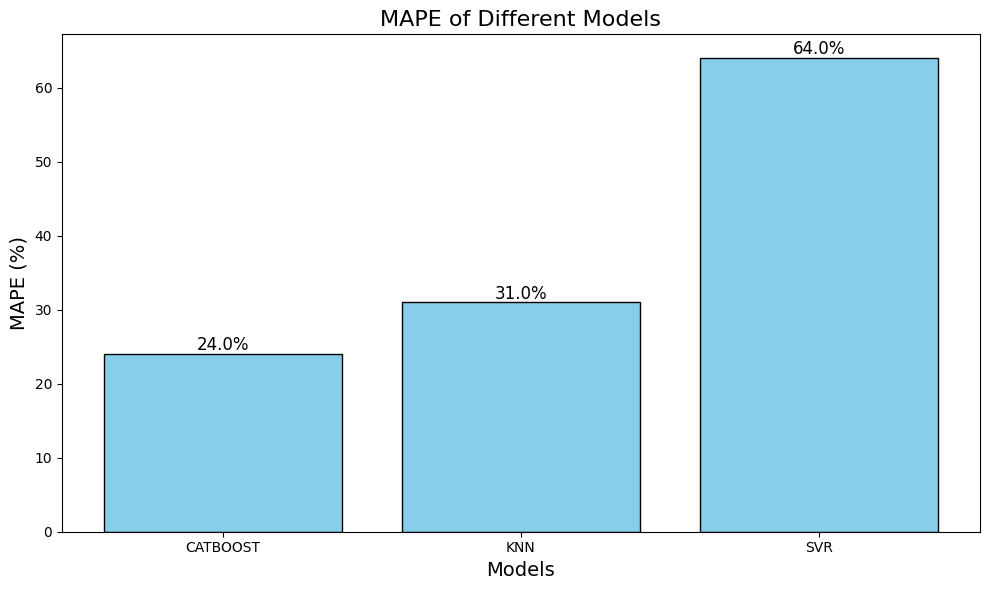

In [3]:
import matplotlib.pyplot as plt

# Dummy dictionary containing model names and their MPAE values
mpae_values = {
    "CATBOOST": 24,
    "KNN": 31,
    "SVR": 64,
}

# Extract model names and MPAE values
models = list(mpae_values.keys())
mpae = list(mpae_values.values())

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(models, mpae, color='skyblue', edgecolor='black')

# Add titles and labels
plt.title("MAPE of Different Models", fontsize=16)
plt.xlabel("Models", fontsize=14)
plt.ylabel("MAPE (%)", fontsize=14)

# Add value labels on top of each bar
for i, value in enumerate(mpae):
    plt.text(i, value + 0.5, f"{value:.1f}%", ha='center', fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()
